In [141]:
import pandas as pd
from pandas import Series, DataFrame
import warnings
warnings.filterwarnings("ignore")
#Source Credit: GITHUB: https://github.com/gaur-pankaj/exploratorydataanalysis/
# lets import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [142]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [143]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [144]:
titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Titanic In Depth EDA

"""First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

2.) What deck were the passengers on and how does that relate to their class?

3.) Where did the passengers come from?

4.) Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?

Lets start with first question,

Who were the passengers on the titanic?"""

<AxesSubplot: xlabel='class', ylabel='count'>

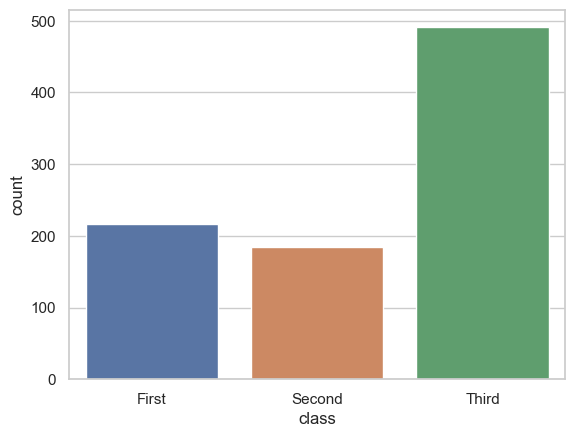

In [145]:

sns.countplot(x=titanic_df["class"])

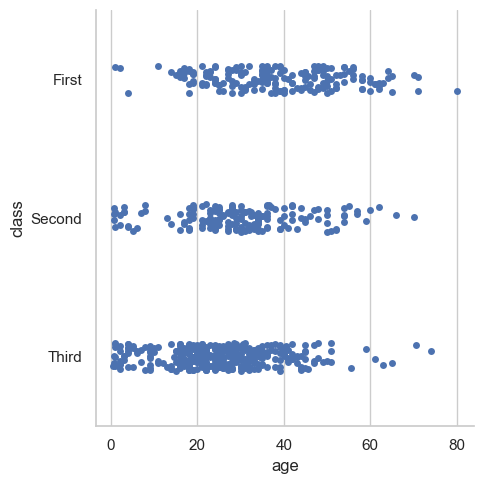

In [146]:
titanic_df = sns.load_dataset("titanic")
sns.catplot(data=titanic_df, x="age", y="class")

<AxesSubplot: xlabel='sex', ylabel='count'>

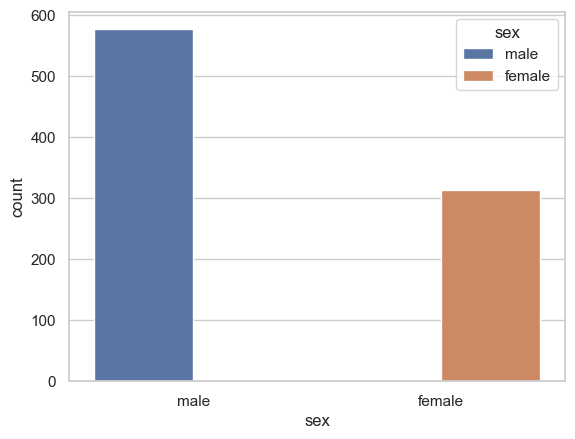

In [147]:
#let's first check gender
sns.countplot(data=titanic_df, x='sex', hue='sex')
# more than 50% of the passengers are male

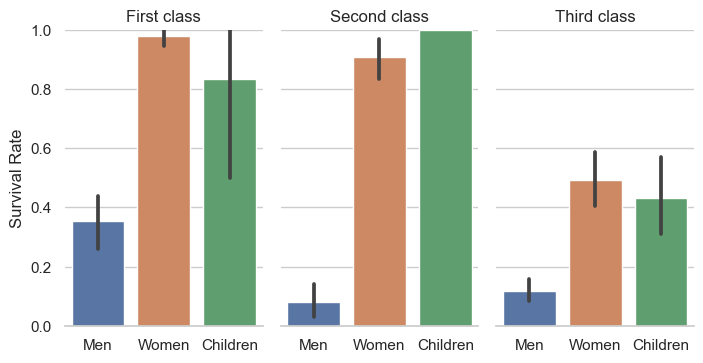

In [148]:
g = sns.catplot(
    data=titanic_df, x="who", y="survived", col="class",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(["Men", "Women", "Children"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)

<AxesSubplot: xlabel='pclass', ylabel='count'>

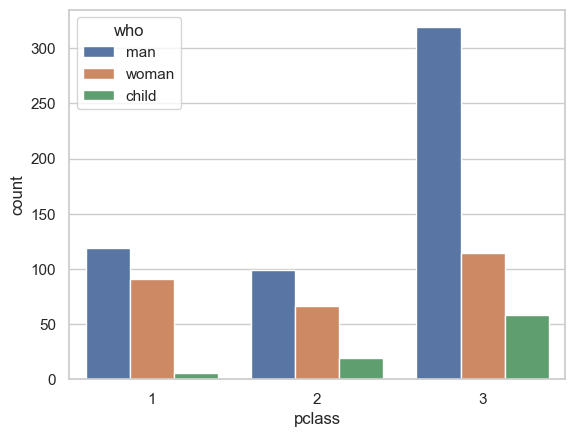

In [149]:
sns.countplot(data=titanic_df, x='pclass', hue='who' )

In [150]:
#now lets create a separate column for children
def male_female_child(passenger):
    '''
    we will be passing Age and Sex, and if age is less than 16 years old, then we would consider that passenger as a child
    '''
    sex,age = passenger
    #comparing the age
    if age < 16:
        return 'child'
    else:
        return sex

In [151]:
df = pd.read_csv('Titanic.csv')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [153]:
# we are creating a new column named 'person', we need specify axis=1 for column
df['Person'] = df[['Sex', 'Age']].apply(male_female_child, axis=1)

In [154]:
df['Person'].value_counts()/len(df)*100


male      60.269360
female    30.415264
child      9.315376
Name: Person, dtype: float64

In [155]:
df['Person'].unique()

array(['male', 'female', 'child'], dtype=object)

<AxesSubplot: xlabel='pclass', ylabel='count'>

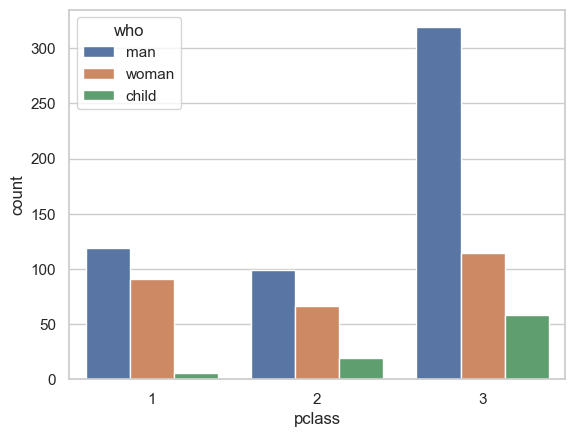

In [156]:
# now lets see how many males, females, children are present in each class
sns.countplot(data=titanic_df, x='pclass', hue='who' )

"""We have a good idea now of Age and Gender of the people on Board we can now take a look 
at which Deck they where on"""

In [157]:
# Deck information is present in Cabin variable
# we can see there are lot of NaN in the Cabin variable
# lets get the Deck information from Cabin variable
deck = DataFrame(df['Cabin'].str.slice(0,1).dropna())
deck.columns=['Deck']
deck.head()

,Deck
1,C
3,C
6,E
10,G
11,C


<AxesSubplot: xlabel='Deck', ylabel='count'>

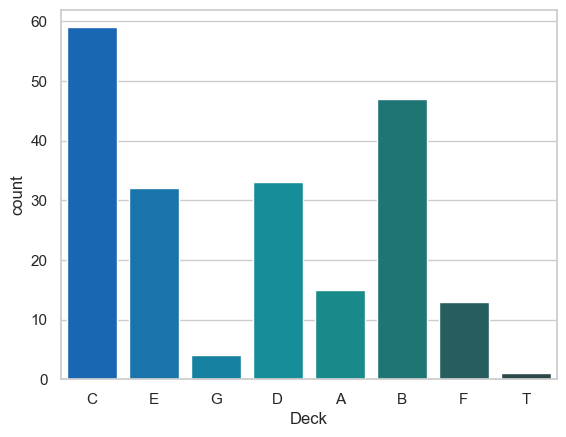

In [158]:
sns.countplot(data=deck, x='Deck', palette='winter_d')

"""As you can see in the graph we have a deck "T" which doesn't make sense much, better to drop it off."""

In [159]:
# Redefining the Deck information after deleting T deck
deck = deck[deck.Deck!='T']

<AxesSubplot: xlabel='Deck', ylabel='count'>

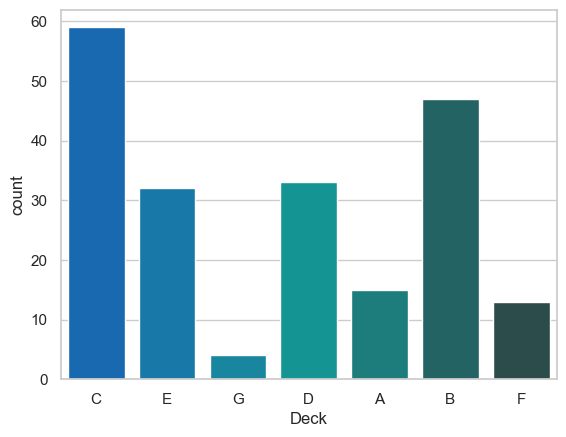

In [160]:
#replot the Deck information
sns.countplot(data=deck, x='Deck', palette='winter_d')

<AxesSubplot: xlabel='Embarked', ylabel='count'>

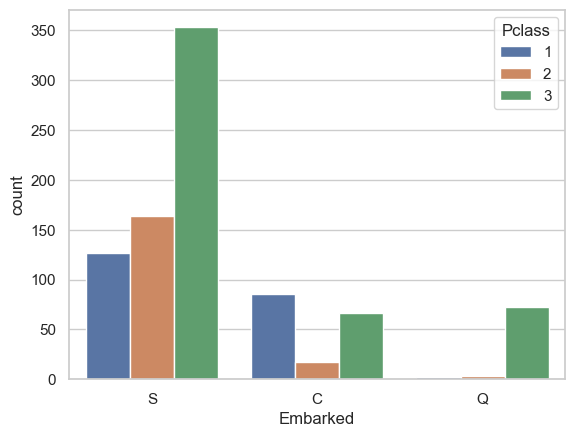

In [161]:
sns.countplot(data=df, x='Embarked', hue='Pclass')

"""It is interesting to note that most of the passengers embarked from 'Q' took class 3, this could be related to the economy of that city

Now check about the family, who are alone and who are travelling with family?"""

In [162]:
# let's start by adding a new column which will define the alone
#We will add the parent/child column with sibsp column

df['Alone'] = df.Parch + df.SibSp

In [163]:
titanic_df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


"""To Make it easier to use lets change the data in the Alone column from number to alone or with Family, Now we know if the Alone>0, then that passenger had family aboard and wasn't alone. if Alone=0, passenger is alone"""

In [164]:
df['Alone'].loc[df['Alone']>0] ='With Family'
df['Alone'].loc[df['Alone']==0] = 'Alone'

In [165]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family


now lets see the visualization for a passenger travelling alone or with Family with respect to ship class

<AxesSubplot: xlabel='Pclass', ylabel='count'>

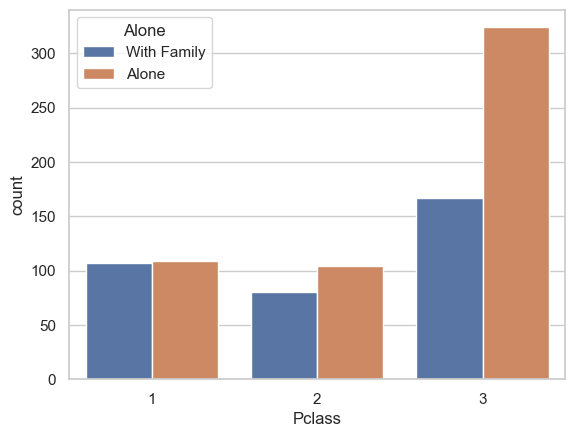

In [166]:
sns.countplot(data=df, x='Pclass', hue='Alone')

Let's take a look at the passenger categorization between Alone or with Family

"""Let's take a look at the contributing factors to the survival of the passengers."""

In [167]:
# lets start by creating a new colummns which tells us more clearly whether person survived or not
df['Survivor'] = df['Survived'].map({0:"no", 1:"yes"})

<AxesSubplot: xlabel='Survivor', ylabel='count'>

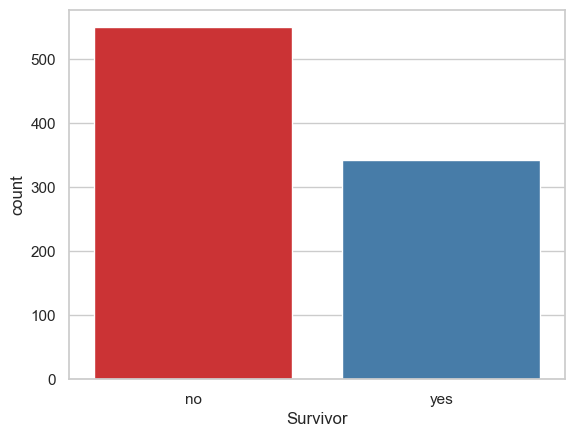

In [168]:
sns.countplot(data=df, x='Survivor', palette='Set1')

"""The Survival Rate is less thab 50%, Let's take a look at this in Classes where the Cabins Where."""

<AxesSubplot: xlabel='Pclass', ylabel='count'>

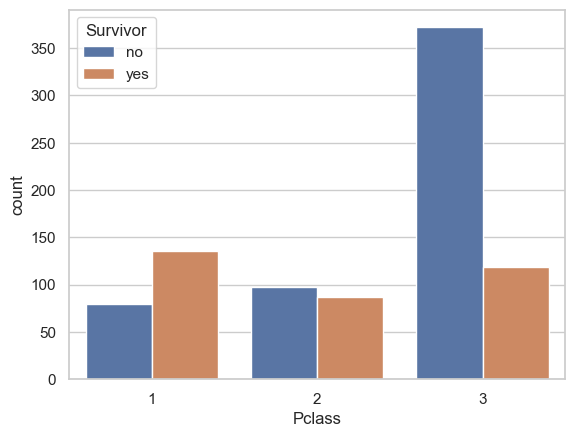

In [169]:
sns.countplot(data=df, x='Pclass', hue='Survivor')

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

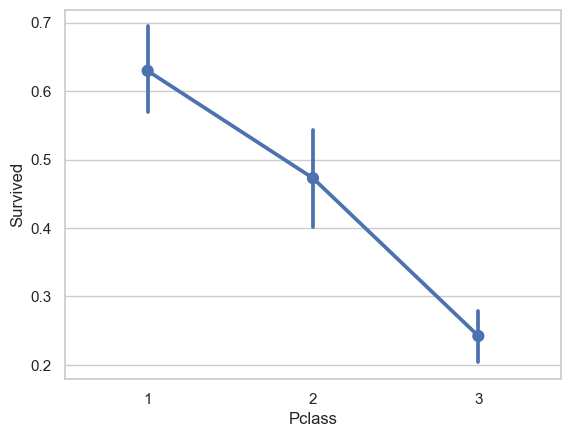

In [170]:
sns.pointplot(data=df, x='Pclass', y='Survived')

"""The two graphs above proves that Class 3 survival rate is substatially lower than the other two classes."""

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Person       891 non-null    object 
 13  Alone        891 non-null    object 
 14  Survivor     891 non-null    object 
dtypes: float64(2), int64(5), object(8)
memory usage: 104.5+ KB


<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

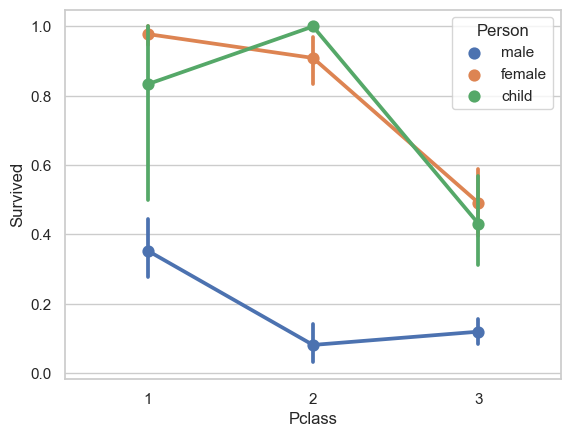

In [172]:
# lets plot the Surviving with Pclass and person
sns.pointplot(data=df, x='Pclass', y='Survived', hue='Person')


"""We can also take a look at what role the passenger Gender played in this situation. From the plot above it is clear that preference goes to women and Children over Male."""

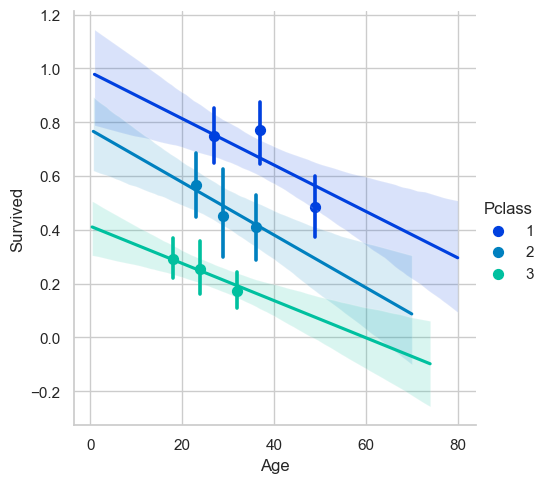

In [173]:
# lets check linear plot of Age vs Survived with Class as hue
sns.lmplot(x='Age',y= 'Survived', data=df, hue='Pclass', palette='winter', x_bins=3);

"""We can also take a look to see if the cabin plays a role in the survival Rate"""

In [174]:
Cabin_Surv = DataFrame(df['Survivor'], df['Embarked'])

In [175]:
Surv_Cabin_post = DataFrame(df['Survivor'])
Surv_Cabin_post['Deck'] = df['Cabin'].str.slice(0,1)

In [176]:
Surv_Cabin_post = Surv_Cabin_post[Surv_Cabin_post['Deck'].notnull()]

In [177]:
Surv_Cabin_post = Surv_Cabin_post[Surv_Cabin_post['Deck']!='T']

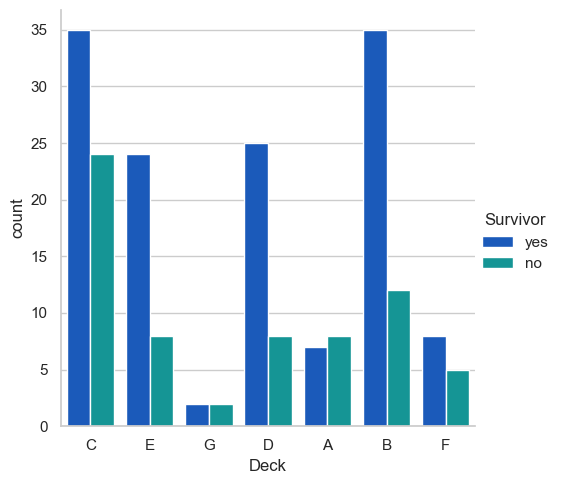

In [178]:
sns.catplot(x="Deck", data=Surv_Cabin_post, hue='Survivor', kind='count', palette='winter');

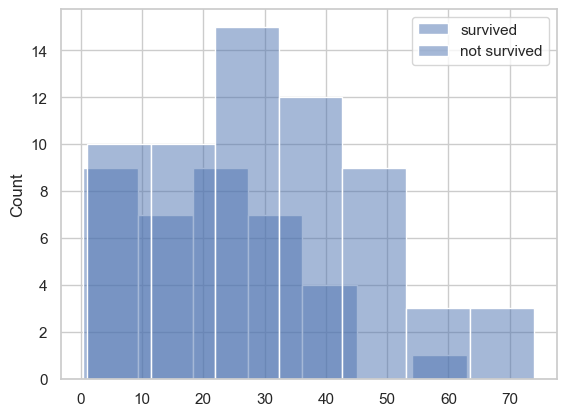

In [179]:
# lets check survival and age from different class they belong
sns.histplot(df[(df.Survived == 1) & (df.Pclass == 3)].groupby(df['Age']), color = "Red")
sns.histplot(df[(df.Survived == 0) & (df.Pclass == 3)].groupby(df['Age']), color = "Blue")
plt.legend(labels = ["survived", "not survived"])

# unfortunately for 3rd class it was not the case but one can argue if age was recorded for all

"""From th egraphic above we can see that B and C Has the most survivors but C also has the most deaths. From this Annalisys and Vizualition we have concluded that. The survival rate of Male passengers where the lowest, Cabin C has the most deaths and Cabin B has the best survuval Rate. """